In [1]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from bson.son import SON
from bson.code import Code
import json
import pandas as pd
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
# These are packages need for natural language processing:
import nltk
from __future__ import division, unicode_literals 
from textblob import TextBlob as tb
import math
from datetime import datetime
from dateutil import parser

In [2]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import amazon_data_sort 
from amazon_data_sort import get_b_product, get_reviews
import doc_summarization as ds

In [3]:
client = MongoClient()
mbf = client.dsbc.mbf
product_info = client.dsbc.product_info
name = product_info.find({}, {"_id":0,"asin":1,"title":1,"price":1})
beauty_list  = {}
for id_num in name:
    try:
        beauty_list[id_num["asin"]]=[id_num["title"],id_num["price"]]
    except:
        pass
#Creating database for reviews beauty file
rbf = client.dsbc.rbf

###[u'Olay Professional Pro-X Hydra Firming Cream Anti Aging 1.7 Oz', 15.38]

i don't find it that good.-i'm about half way through the jar and don't see a lot of difference.i do not have to use anything separate for my eyelids or skin surrounding my eyes.-i don't see much difference between the products (regenerist and pro-x), but pro-x is much more expensive.although this product leaves your face feeling very silky and smooth, i do not see any change in the appearance of my skin; especially when the product states its a &#34;firming cream&#34;?-even my children tell i look younger than my friends the same age.this is the best moisturizer i've ever used.save your money.-for the price you can't go wrong because it works just as well as the expensive creams.


(-0.5, 799.5, 799.5, -0.5)

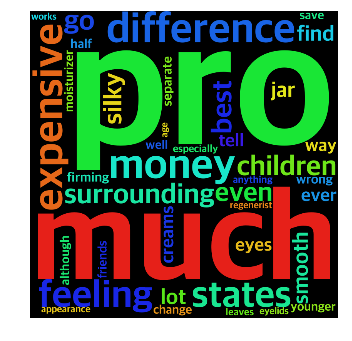

In [7]:
text = '-'.join(ds.summarize(get_b_product(beauty_list,3)['Reviews'])['mean_score_summary'])
wordcloud1 = WordCloud(font_path='/Library/Fonts/AppleSDGothicNeo-ExtraBold.otf',
                      width=800, height=800,
                      stopwords=STOPWORDS.update(["buy","use", "product", "skin", "will", "cream", "year", "Olay",
                                                  "face", "good","using", "products", "really", "see", "OlayX","olay", 
                                                  "price", "make", "X", "Pro", "look", "day", "years", "feel", "line",
                                                  "Pro", "used", "use", "x"])).generate(text)
print text
plt.imshow(wordcloud1)
plt.axis("off")

i don't find it that good.-i'm about half way through the jar and don't see a lot of difference.i do not have to use anything separate for my eyelids or skin surrounding my eyes.-i don't see much difference between the products (regenerist and pro-x), but pro-x is much more expensive.although this product leaves your face feeling very silky and smooth, i do not see any change in the appearance of my skin; especially when the product states its a &#34;firming cream&#34;?-even my children tell i look younger than my friends the same age.this is the best moisturizer i've ever used.save your money.-for the price you can't go wrong because it works just as well as the expensive creams.


(-0.5, 799.5, 799.5, -0.5)

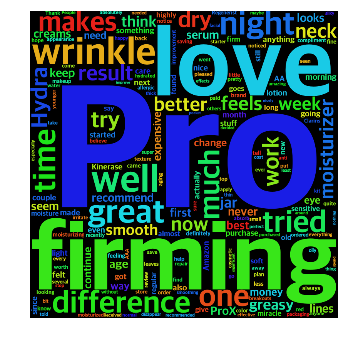

In [5]:
wordcloud1 = WordCloud(font_path='/Library/Fonts/AppleSDGothicNeo-ExtraBold.otf',
                      width=800, height=800,
                      stopwords=STOPWORDS.update(["buy","use", "product", "skin", "will", "cream", "year", "Olay",
                                                  "face", "good","using", "products", "really", "see", "OlayX","olay", 
                                                  "price", "make", "X", "Pro", "look", "day", "years", "feel", "line",
                                                  "Pro", "used", "use", "x"])).generate(get_b_product(beauty_list,3)['Reviews'])
print text
plt.imshow(wordcloud1)
plt.axis("off")

In [6]:
get_reviews(beauty_list,43)

{u'B002X7WV32': [u'Shiseido Future Solution Lx Total Regenerating Cream for Unisex, 1.7 Ounce',
  176.25],
 'Reviews': [[u'I purchased one for my mom (late 50s) and another one for myself (late 20s). Besides the fact that I love my mom, I bought the product for her because I wanted to get a second opinion (I would be inclined to convince myself, "After all, it\'s expensive and is made by a reputable brand. This has got to work!!"). After 4 months of use, both my mom and I agreed that this cream is a good moisturizer at best. Its ingredient list include components of moisturizer and emollient. The product\'s antioxidant stuff, such as camellia sinensis and tocopherol, go in the very last part of the ingredient list, meaning that there\'s very little of them relative to other components in the product (I actually took a class on how to read ingredient labels). In other words, I would bank in more antioxidants by eating berries and drinking a cup of green tea.  I am happy that I tried the